## Introduction to the Sample Final Test

Dear Students,

Welcome to the sample final test for our laboratory course. This test is designed to assess your understanding and application of the concepts and techniques we have covered throughout the semester. 

Instructions:

Read Each Question Carefully: Ensure you understand what is being asked before you start coding.

Write Clean and Commented Code: Your code should be well-organized and include comments explaining your logic.

Test Your Code: Make sure to test your code with different inputs to ensure it works correctly.

Conclusions: Make final decisions, decide about the statistical and practical significance. 

Resources:

You are allowed to use your notes, textbooks, and online resources to help you complete the test. 

**Please be advised that the use of any Generative AI (GenAI) tools is strictly prohibited during this test. This includes, but is not limited to, tools that generate code, text, or any other form of content based on AI algorithms.**

Collaboration with classmates is not permitted. This test is an individual assessment of your skills.

I encourage you to take your time and approach each question methodically. This test is an opportunity to demonstrate your proficiency and understanding of the material. 

Best regards,

Karol
/Mathematical Statistics 2024/2025/



# Task 1: Verify the Hypothesis

Objective: Verify the hypothesis that the salaries of professors working in theoretical departments (B) are much lower than those working in applied departments (A).

   rownames      rank discipline  yrs.since.phd  yrs.service   sex  salary
0         1      Prof          B             19           18  Male  139750
1         2      Prof          B             20           16  Male  173200
2         3  AsstProf          B              4            3  Male   79750
3         4      Prof          B             45           39  Male  115000
4         5      Prof          B             40           41  Male  141500
216 181


C:\Users\kizer\AppData\Local\Temp\ipykernel_46156\3522780586.py:17: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([applied_salaries, theoretical_salaries], labels=['Applied (A)', 'Theoretical (B)'])


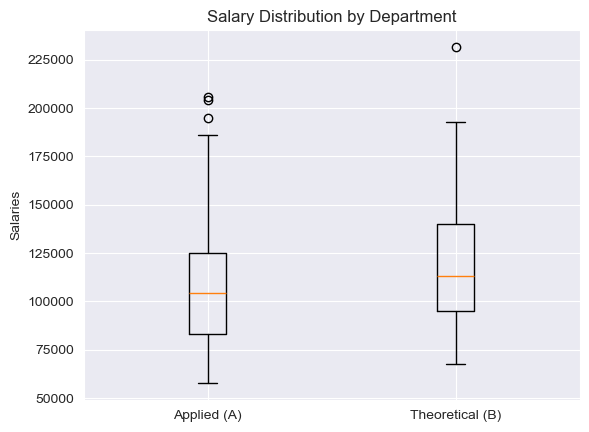

In [1]:
import pandas as pd

# Load the Salaries dataset from the URL
url = "https://vincentarelbundock.github.io/Rdatasets/csv/carData/Salaries.csv"
salaries = pd.read_csv(url)

# Filter the data based on the department type
theoretical_salaries = salaries[salaries['discipline'] == 'B']['salary']
applied_salaries = salaries[salaries['discipline'] == 'A']['salary']
# Display the first few rows of the dataset
print(salaries.head())
print(len(theoretical_salaries), len(applied_salaries))
salaries['rank'].unique()
import matplotlib.pyplot as plt

# Example visualization
plt.boxplot([applied_salaries, theoretical_salaries], labels=['Applied (A)', 'Theoretical (B)'])
plt.title('Salary Distribution by Department')
plt.ylabel('Salaries')
plt.show()


In [2]:
from scipy.stats import shapiro

stat, p_value = shapiro(theoretical_salaries)
alpha = 0.05
print(f"stat: {stat}, p-value: {p_value}")
if p_value > alpha:
    print("data is normally distributed")
else:
    print("data is not normally distributed")
    
stat, p_value = shapiro(applied_salaries)
alpha = 0.05
print(f"stat: {stat}, p-value: {p_value}")
if p_value > alpha:
    print("data is normally distributed")
else:
    print("data is not normally distributed")

stat: 0.9611942982211146, p-value: 1.2710090838425288e-05
data is not normally distributed
stat: 0.9418299292200768, p-value: 1.0267201943205751e-06
data is not normally distributed


In [3]:
# your solution
#if data would be normally distributed we could use t-test one-tailed independent
#but data is not normally distributed so we use mann-whitney U test
from scipy.stats import mannwhitneyu

stat, p_value = mannwhitneyu(theoretical_salaries, applied_salaries, alternative='less')
alpha = 0.05
print(f"stat: {stat}, p-value: {p_value}")
if p_value < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")



stat: 23386.0, p-value: 0.9996253831629534
Fail to reject the null hypothesis


failed to reject null hypothesis so we can say that salaries of professors working in theoretical departments are not much lower than those working in applied departments.

# Task 2: Verify the Hypothesis

Objective: Verify if the proportion of higher rank professors (associate and full professors) is significantly different between male and female scientists.

In [4]:
# your solution
from scipy.stats import chi2_contingency
higher_rank = salaries[(salaries['rank'] == 'AsstProf') | (salaries['rank'] == 'Prof')]
lower_rank = salaries[salaries['rank'] == 'AssocProf']
num_high_men = len(higher_rank[higher_rank['sex'] == 'Male'])
num_high_women = len(higher_rank[higher_rank['sex'] =='Female'])
num_lower_men = len(lower_rank[lower_rank['sex'] == 'Male'])
num_all_women = len(lower_rank[lower_rank['sex'] == 'Female']) 


contingency_table = [
    [num_high_men, num_lower_men],  # Male: [Higher Rank, Lower Rank]
    [num_high_women, num_all_women]   # Female: [Higher Rank, Lower Rank]
]

print(contingency_table)


stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Display results
print("Chi-Squared Test for Independence:")
print(f"Chi-Squared Statistic: {stat}, P-Value: {p_value}, Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

# Interpret results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: Proportions of higher-rank professors differ by gender.")
else:
    print("Fail to reject the null hypothesis: No significant difference in proportions by gender.")

[[304, 54], [29, 10]]
Chi-Squared Test for Independence:
Chi-Squared Statistic: 2.170598964517, P-Value: 0.14067143446846783, Degrees of Freedom: 1
Expected Frequencies:
[[300.28715365  57.71284635]
 [ 32.71284635   6.28715365]]
Fail to reject the null hypothesis: No significant difference in proportions by gender.


# Task 3: Verify the Hypothesis

Objective: Verify if the salaries of professors are significantly different based on rank, gender, and discipline, and check for interactions between these groups.

## Main effects hypothesis
   - Null hypothesis: salaries do not differ based on rank, gender or discipline individually
   - Alternative hypothesis: salaries differ based on rank, gender or discipline individually

## Interaction effects hypothesis:
   - Null hypothesis: there are no interactions between rank, gender and discipline affecting salaries
   - Alternative hypothesis: there are significant interactions between factors affecting salaries

In [5]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Fit the ANOVA model
model = ols('salary ~ rank * sex * discipline', data=salaries).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Display the ANOVA table
print(anova_table)


                           sum_sq     df           F        PR(>F)
rank                 1.452438e+11    2.0  140.044590  1.980674e-46
sex                  7.587567e+08    1.0    1.463192  2.271652e-01
discipline           1.847478e+10    1.0   35.626894  5.427699e-09
rank:sex             2.184938e+08    2.0    0.210672  8.101327e-01
rank:discipline      4.748308e+08    2.0    0.457833  6.329968e-01
sex:discipline       4.619741e+08    1.0    0.890874  3.458325e-01
rank:sex:discipline  1.323930e+08    2.0    0.127654  8.801953e-01
Residual             1.996466e+11  385.0         NaN           NaN


In [6]:
# your solution
# Function to identify outliers
from scipy.stats import zscore
def identify_outliers(group):
    z_scores = zscore(group['salary'])
    abs_z_scores = abs(z_scores)
    outliers = abs_z_scores > 3
    return group[outliers]

# Group by 'rank' and 'gender' and 'discipline' and identify outliers in 'salary'
outliers = salaries.groupby(['rank', 'sex', 'discipline']).apply(identify_outliers).reset_index(drop=True)
# Display the outliers
print(outliers)

   rownames  rank discipline  yrs.since.phd  yrs.service   sex  salary
0        44  Prof          B             38           38  Male  231545


C:\Users\kizer\AppData\Local\Temp\ipykernel_46156\1236564193.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  outliers = salaries.groupby(['rank', 'sex', 'discipline']).apply(identify_outliers).reset_index(drop=True)


266


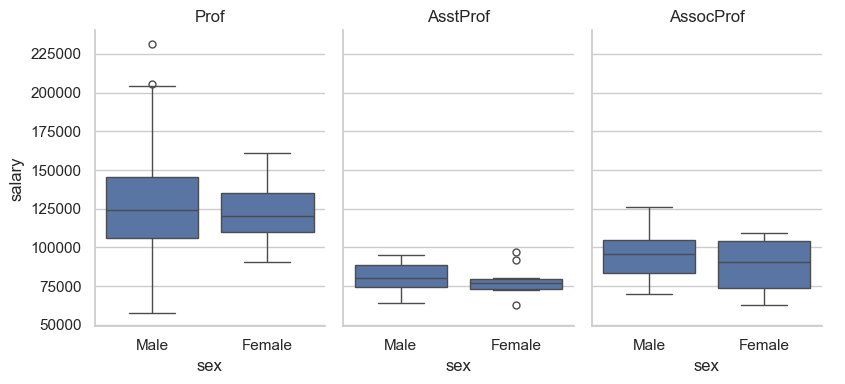

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a boxplot
sns.set(style="whitegrid")
g = sns.catplot(x="sex", y="salary", col="rank", data=salaries, kind="box", height=4, aspect=0.7)
print(len(salaries[salaries['rank'] == 'Prof']))
# Set the titles and labels
g.set_titles("{col_name}")
g.set_axis_labels("sex", "salary")

In [8]:
from scipy.stats import levene, shapiro

# Example for normality and variance testing
shapiro_result = shapiro(salaries['salary'])
levene_result = levene(*[group['salary'] for _, group in salaries.groupby(['rank', 'sex', 'discipline'])])
print("Shapiro-Wilk:", shapiro_result)
print("Levene:", levene_result)


Shapiro-Wilk: ShapiroResult(statistic=0.9598763278424713, pvalue=6.0760521230309575e-09)
Levene: LeveneResult(statistic=9.046974891330155, pvalue=2.063886339073554e-14)


data don't pass normality and variance testing, let's try to transform them into log or square root


In [9]:
import numpy as np
salaries['salary_log'] = np.log(salaries['salary'])
shapiro_result = shapiro(salaries['salary_log'])
levene_result = levene(*[group['salary_log'] for _, group in salaries.groupby(['rank', 'sex', 'discipline'])])
print("Shapiro-Wilk:", shapiro_result)
print("Levene:", levene_result)

Shapiro-Wilk: ShapiroResult(statistic=0.9902060850384236, pvalue=0.009558945366679056)
Levene: LeveneResult(statistic=7.0927354800992015, pvalue=5.408840884368279e-11)


normality a bit better but still data is not normal and variance are not passing tests

In [10]:
salaries['salary_sqrt'] = np.sqrt(salaries['salary'])
shapiro_result = shapiro(salaries['salary_sqrt'])
levene_result = levene(*[group['salary_sqrt'] for _, group in salaries.groupby(['rank', 'sex', 'discipline'])])
print("Shapiro-Wilk:", shapiro_result)
print("Levene:", levene_result)

Shapiro-Wilk: ShapiroResult(statistic=0.9801808947141982, pvalue=2.9113400676270653e-05)
Levene: LeveneResult(statistic=8.374826348645382, pvalue=3.0390580477481604e-13)


square rooting also didn't help

In [11]:
# i will use Kruskal-wallis test since it is non-parametric equivalence to one-way anova and can be extended for comparing multiple independent groups
from scipy.stats import kruskal

# Example: Kruskal-Wallis test for rank
ranks = [group['salary'] for _, group in salaries.groupby('rank')]
stat, p_value = kruskal(*ranks)
print(f"Kruskal-Wallis Test for Rank: stat = {stat}, p-value = {p_value}")

# Example: Kruskal-Wallis test for gender
ranks = [group['salary'] for _, group in salaries.groupby('sex')]
stat, p_value = kruskal(*ranks)
print(f"Kruskal-Wallis Test for sex: stat = {stat}, p-value = {p_value}")

# Example: Kruskal-Wallis test for discipline
ranks = [group['salary'] for _, group in salaries.groupby('discipline')]
stat, p_value = kruskal(*ranks)
print(f"Kruskal-Wallis Test for discipline: Stat= {stat}, p-value = {p_value}")


Kruskal-Wallis Test for Rank: stat = 194.00613573809926, p-value = 7.449084431170446e-43
Kruskal-Wallis Test for sex: stat = 6.985120835074707, p-value = 0.008219010395378852
Kruskal-Wallis Test for discipline: Stat= 11.359998851888736, p-value = 0.0007504287087290172


In [12]:
#post-hoc analysis
from scikit_posthocs import posthoc_dunn

# Perform Dunn's test for pairwise comparisons
posthoc = posthoc_dunn(salaries, val_col='salary', group_col='rank', p_adjust='bonferroni')
print(posthoc)


ModuleNotFoundError: No module named 'scikit_posthocs'

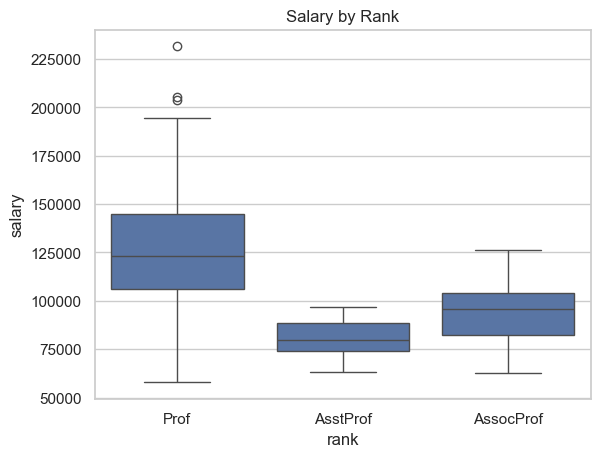

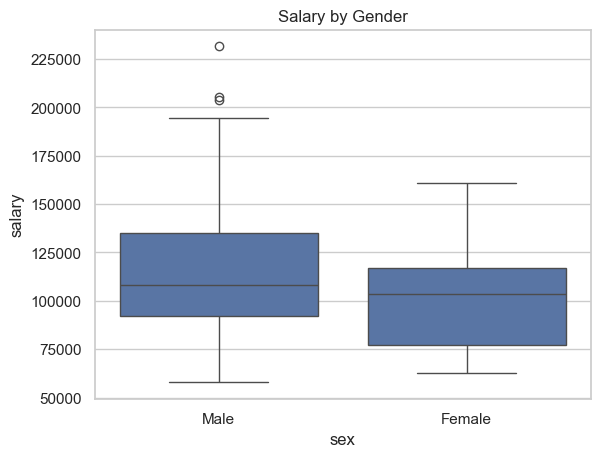

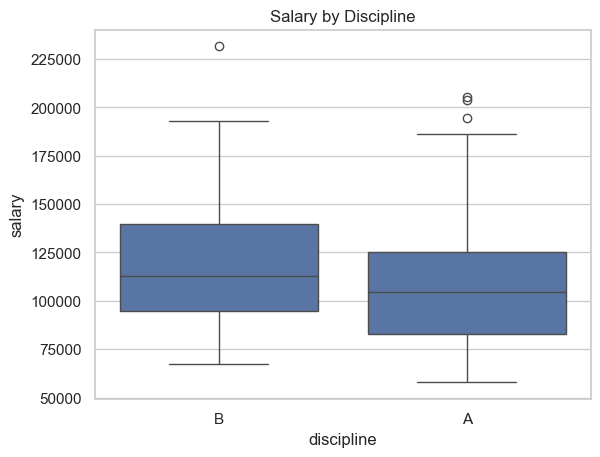

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='rank', y='salary', data=salaries)
plt.title('Salary by Rank')
plt.show()

sns.boxplot(x='sex', y='salary', data=salaries)
plt.title('Salary by Gender')
plt.show()

sns.boxplot(x='discipline', y='salary', data=salaries)
plt.title('Salary by Discipline')
plt.show()


# Task 4: Verify the Hypothesis

Objective: Verify if credit amounts (in DM) are significantly different for people applying with different job, personal status, sex, or age.

In [10]:
import pandas as pd

# Load the GermanCredit dataset from GitHub
url = "https://raw.githubusercontent.com/selva86/datasets/master/GermanCredit.csv"
germancredit = pd.read_csv(url)

# Display the first few rows of the dataset
print(germancredit.head())

                status  duration                            credit_history  \
0         ... < 100 DM         6   critical account/other credits existing   
1    0 <= ... < 200 DM        48  existing credits paid back duly till now   
2  no checking account        12   critical account/other credits existing   
3         ... < 100 DM        42  existing credits paid back duly till now   
4         ... < 100 DM        24           delay in paying off in the past   

               purpose  amount                     savings  \
0  domestic appliances    1169  unknown/no savings account   
1  domestic appliances    5951                ... < 100 DM   
2           retraining    2096                ... < 100 DM   
3     radio/television    7882                ... < 100 DM   
4            car (new)    4870                ... < 100 DM   

  employment_duration  installment_rate                  personal_status_sex  \
0      ... >= 7 years                 4                        male : single  

In [ ]:
# your solution

# Task 5: Evaluate Interaction Between Group and Time

Description: 

The data provide the anxiety score, measured at three time points, of three groups of individuals practicing physical exercises at different levels (grp1: basal, grp2: moderate and grp3: high)

Objective: Evaluate if there is an interaction between group and time in explaining anxiety scores.

In [13]:
import pandas as pd

# Load the anxiety dataset from GitHub
url = "https://raw.githubusercontent.com/kflisikowski/ds/master/anxiety.csv"
anxiety_data = pd.read_csv(url)

# Display the first few rows of the dataset
print(anxiety_data.head())

   Unnamed: 0  id group    t1    t2    t3
0           1   1  grp1  14.1  14.4  14.1
1           2   2  grp1  14.5  14.6  14.3
2           3   3  grp1  15.7  15.2  14.9
3           4   4  grp1  16.0  15.5  15.3
4           5   5  grp1  16.5  15.8  15.7


In [ ]:
# your solution

# Task 6: Evaluate the Goodness of Fit

Objective: Use the goodness of fit test to determine whether the distribution of credit amounts for male customers matches that of female customers.

In [14]:
import pandas as pd

# Load the German Credit dataset from GitHub
url = "https://raw.githubusercontent.com/selva86/datasets/master/GermanCredit.csv"
germancredit = pd.read_csv(url)

# Display the first few rows of the dataset
print(germancredit.head())

                status  duration                            credit_history  \
0         ... < 100 DM         6   critical account/other credits existing   
1    0 <= ... < 200 DM        48  existing credits paid back duly till now   
2  no checking account        12   critical account/other credits existing   
3         ... < 100 DM        42  existing credits paid back duly till now   
4         ... < 100 DM        24           delay in paying off in the past   

               purpose  amount                     savings  \
0  domestic appliances    1169  unknown/no savings account   
1  domestic appliances    5951                ... < 100 DM   
2           retraining    2096                ... < 100 DM   
3     radio/television    7882                ... < 100 DM   
4            car (new)    4870                ... < 100 DM   

  employment_duration  installment_rate                  personal_status_sex  \
0      ... >= 7 years                 4                        male : single  

In [ ]:
# your solution

# Task 7: Evaluate the Change in Asthma Symptoms Over Time

Objective: determine if there is a significant change in asthma symptoms reported by participants at two different time points.

In [2]:
import pandas as pd

# Load the asthma dataset from GitHub
url = "https://github.com/bougioukas/basic_stats_R/raw/main/data/asthma.xlsx"
asthma_data = pd.read_excel(url)

# Display the first few rows of the dataset
print(asthma_data.head())

  know_begin know_end
0        yes      yes
1         no       no
2        yes       no
3         no       no
4         no       no


In [ ]:
# your solution

# Task 8: Differences of BG readings Over Time 

Objective: determine if there is a significant difference in the blood glucose (BG) readings over multiple time points.

Data: let's use a hypothethical example of blood glucose (BG) readings of persons with diabetes.

The test is done three times, say before, within and after a given clinical treatment and we want to know if there is a significant difference within the groups (times).

In [4]:
# Read dataset from url:
import io
import requests
url="https://raw.githubusercontent.com/trangel/stats-with-python/master/data/BG-db.csv"
s=requests.get(url).content
df=pd.read_csv(io.StringIO(s.decode('utf-8')),index_col=0)


df.columns=['before','during','after']
df.index.name='Subject'
df.head(10)

,before,during,after
Subject,,,
0,89.162573,94.023517,94.594145
1,90.857629,95.273755,95.040646
2,94.912999,96.612870,95.200472
3,95.254064,96.818673,97.205801
4,97.136291,97.760342,98.428840
5,99.809999,99.169227,98.867769
6,101.094087,99.579283,99.790581
7,101.531428,99.661758,100.669928
8,101.981148,100.812359,101.751155


In [ ]:
# your solution

# Task 9: Evaluate the Change in Mice Weights Before and After Treatment

Objective: determine if there is a significant difference in the weights of mice before and after treatment.

In [6]:
import pandas as pd

# Weight of the mice before treatment
before = [200.1, 190.9, 192.7, 213, 241.4, 196.9, 172.2, 185.5, 205.2, 193.7]

# Weight of the mice after treatment
after = [392.9, 393.2, 345.1, 393, 434, 427.9, 422, 383.9, 392.3, 352.2]

# Create a data frame
my_data = pd.DataFrame({
    'group': ['before'] * len(before) + ['after'] * len(after),
    'weight': before + after
})

# Display the first few rows of the dataset
print(my_data.head(10))

    group  weight
0  before   200.1
1  before   190.9
2  before   192.7
3  before   213.0
4  before   241.4
5  before   196.9
6  before   172.2
7  before   185.5
8  before   205.2
9  before   193.7


In [ ]:
# your solution

# Task 10: Calculate Effect Size and Power 

Objective: Use Python to calculate the effect size and power for a test comparing the total bill amounts between smokers and non-smokers. Interpret your results. If the power is not satisfactory - how many observations should we sample to achieve 90% power?

The tips dataset contains information about tips received by waitstaff in a restaurant, including various attributes such as total bill, tip amount, sex of the bill payer, whether the payer is a smoker, day of the week, time of day, and size of the party.

The tips dataset contains the following columns:

total_bill: The total bill amount (including tip) in dollars.

tip: The tip amount in dollars.

sex: The sex of the bill payer (Male or Female).

smoker: Whether the bill payer is a smoker (Yes or No).

day: The day of the week (Thur, Fri, Sat, Sun).

time: The time of day (Lunch or Dinner).

size: The size of the party.

In [8]:
import seaborn as sns
import pandas as pd

# Load the tips dataset
tips = sns.load_dataset('tips')

# Display the first few rows of the dataset
print(tips.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


In [ ]:
# your solution